In [3]:
%pip install google.colab 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use("default") 
sns.set(font_scale=1.1)

In [28]:

df=pd.read_csv("heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [31]:
df.shape

(918, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
target_col="HeartDisease"
numeric_cols=["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
categorical_col=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
print(target_col)
print(numeric_cols)
print(categorical_col)

HeartDisease
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [34]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [35]:
df[numeric_cols].agg(["min","max","mean","median"]).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [36]:
for c in categorical_col:
       print(c,df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


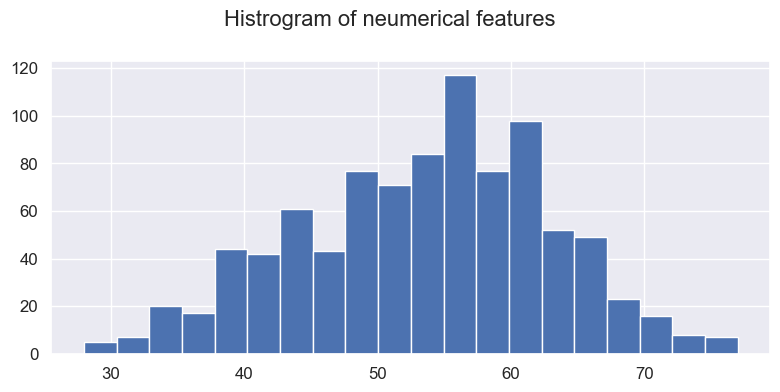

In [37]:
df["Age"].hist(bins=20,figsize=(8,4))
plt.suptitle("Histrogram of neumerical features")
plt.tight_layout()
plt.show()

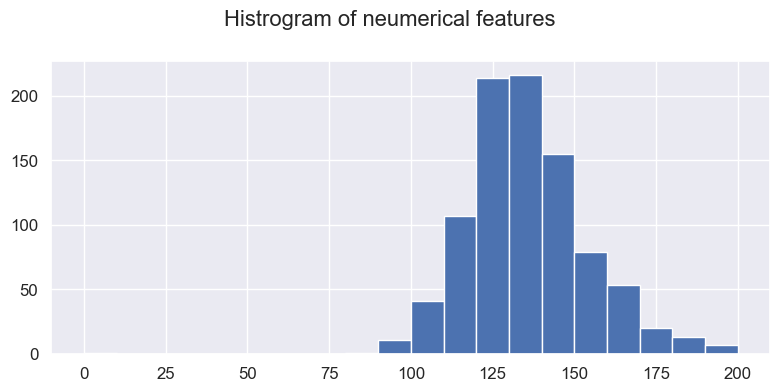

In [38]:
df["RestingBP"].hist(bins=20,figsize=(8,4))
plt.suptitle("Histrogram of neumerical features")
plt.tight_layout()
plt.show()

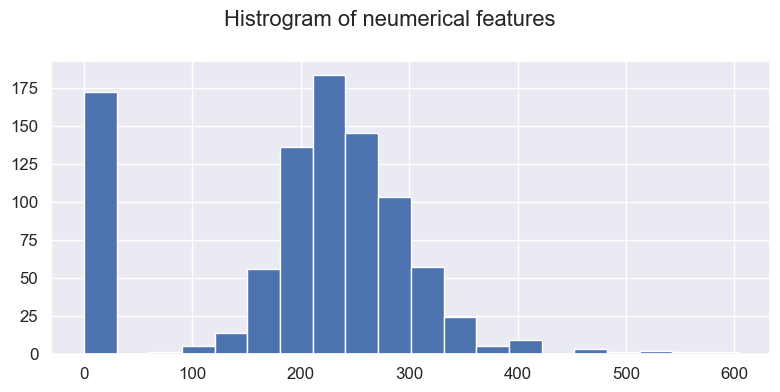

In [39]:
df["Cholesterol"].hist(bins=20,figsize=(8,4))
plt.suptitle("Histrogram of neumerical features")
plt.tight_layout()
plt.show()

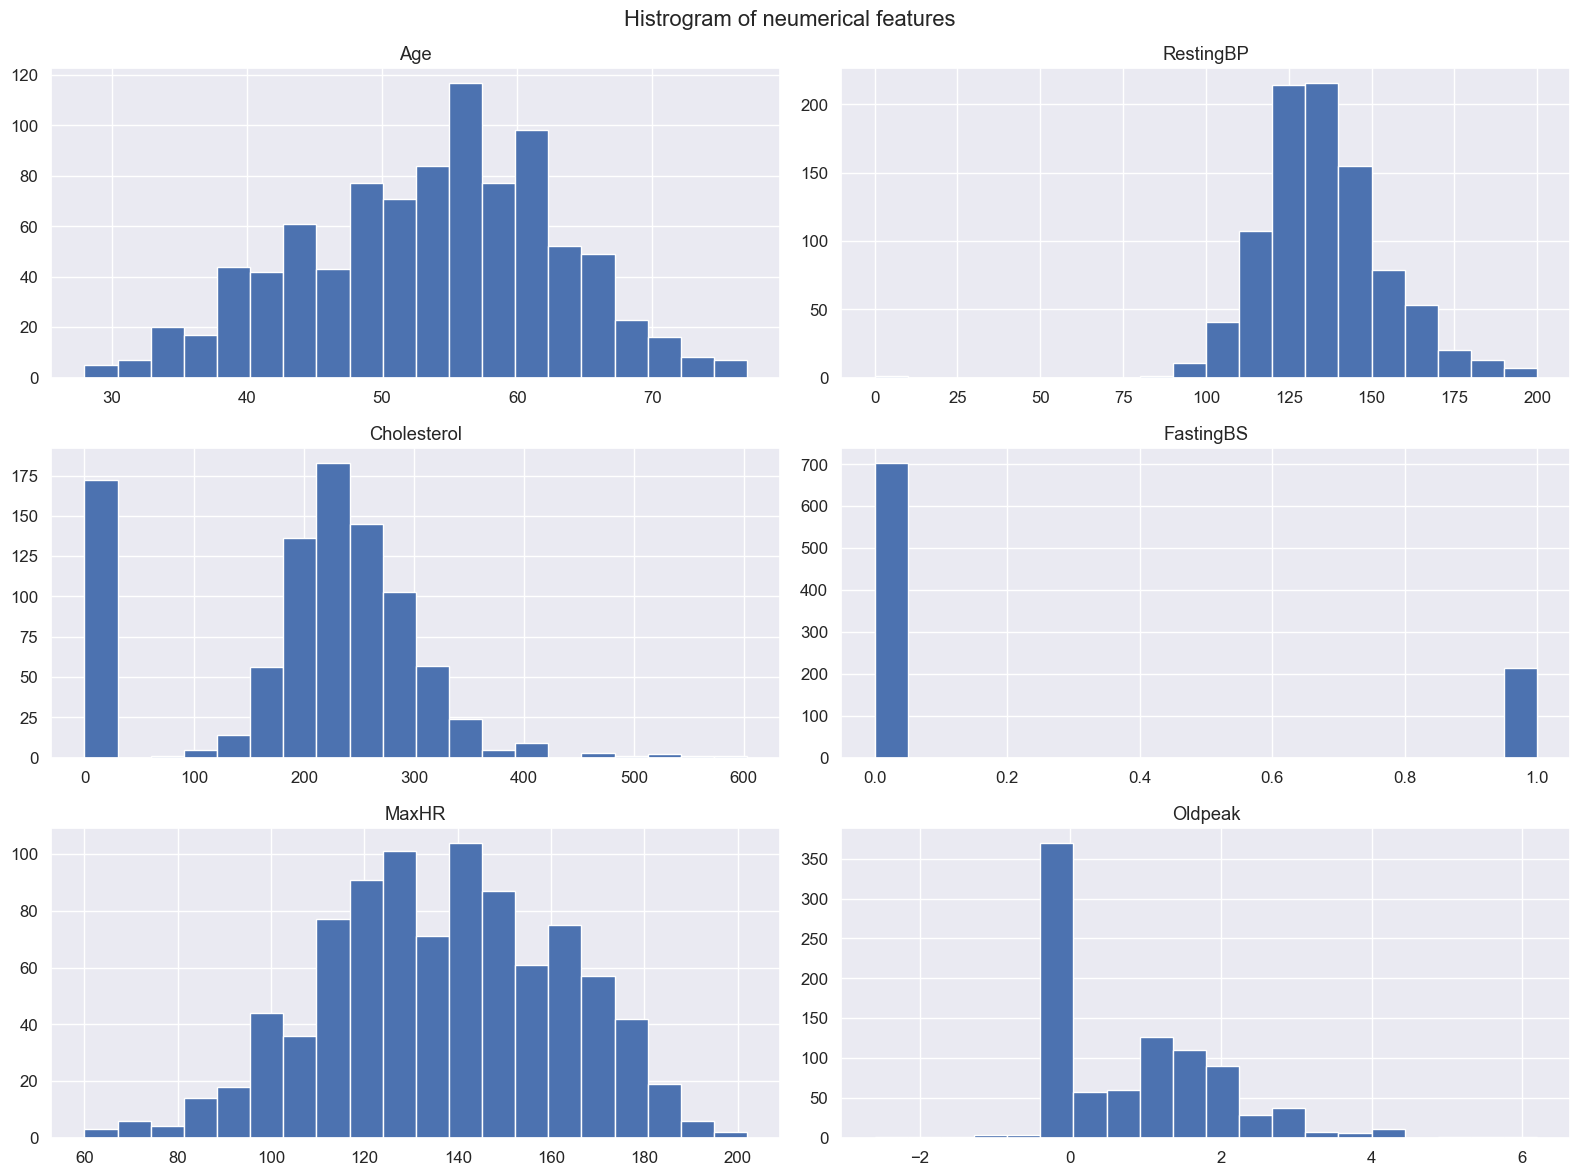

In [40]:
df[numeric_cols].hist(bins=20,figsize=(16,12))
plt.suptitle("Histrogram of neumerical features")
plt.tight_layout()
plt.show()

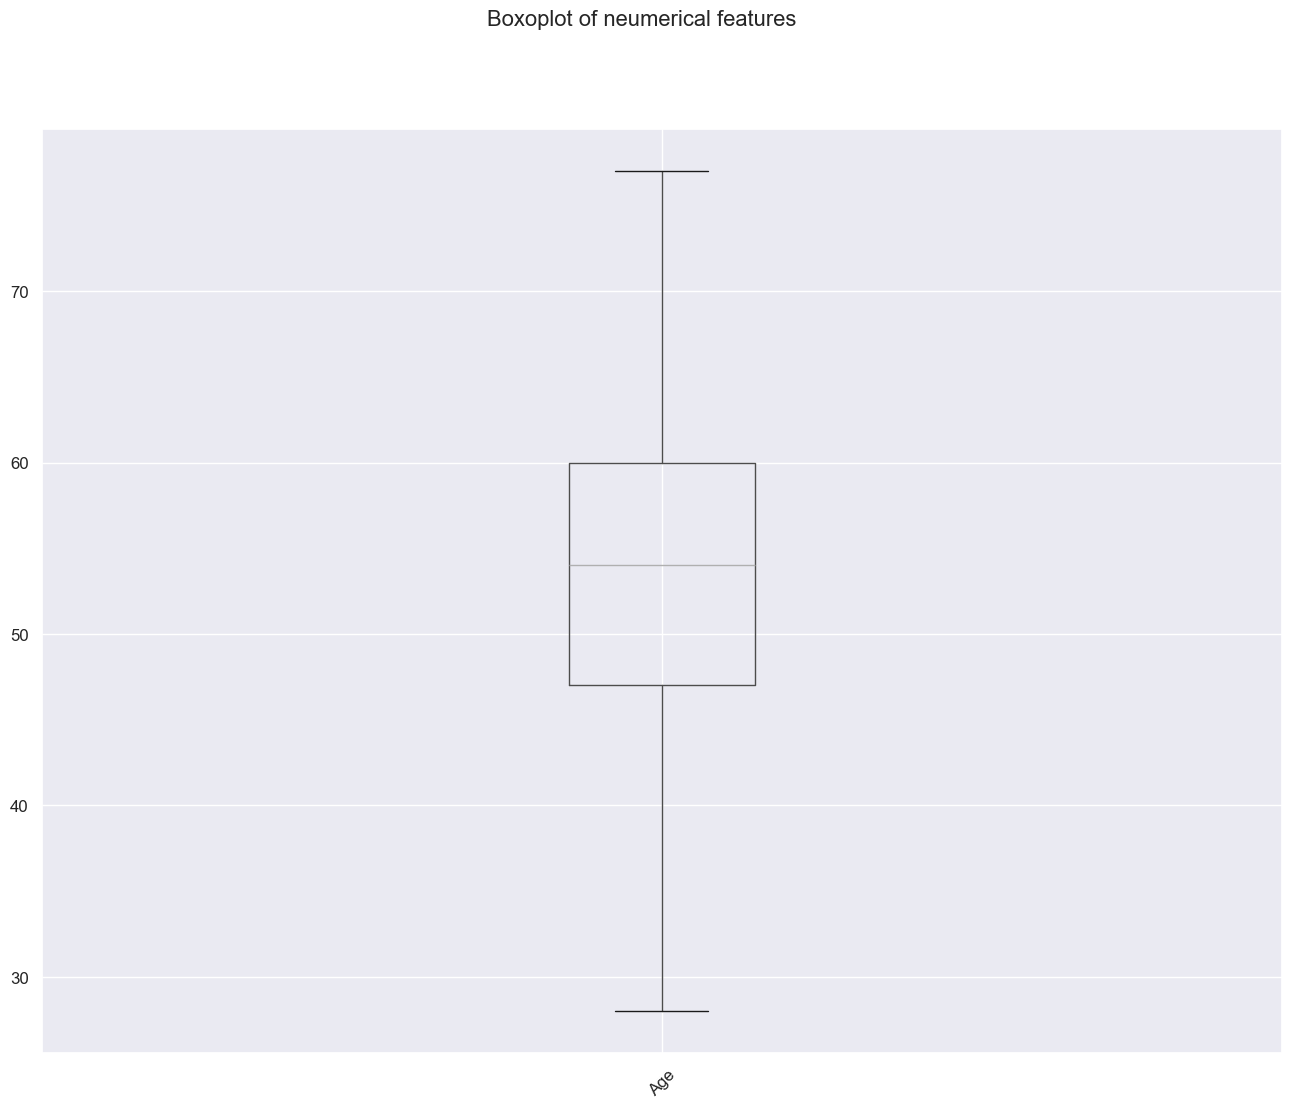

In [41]:
plt.figure(figsize=(16,12))
df.boxplot(column=numeric_cols[0])
plt.suptitle("Boxoplot of neumerical features")
plt.xticks(rotation=45)
plt.show()

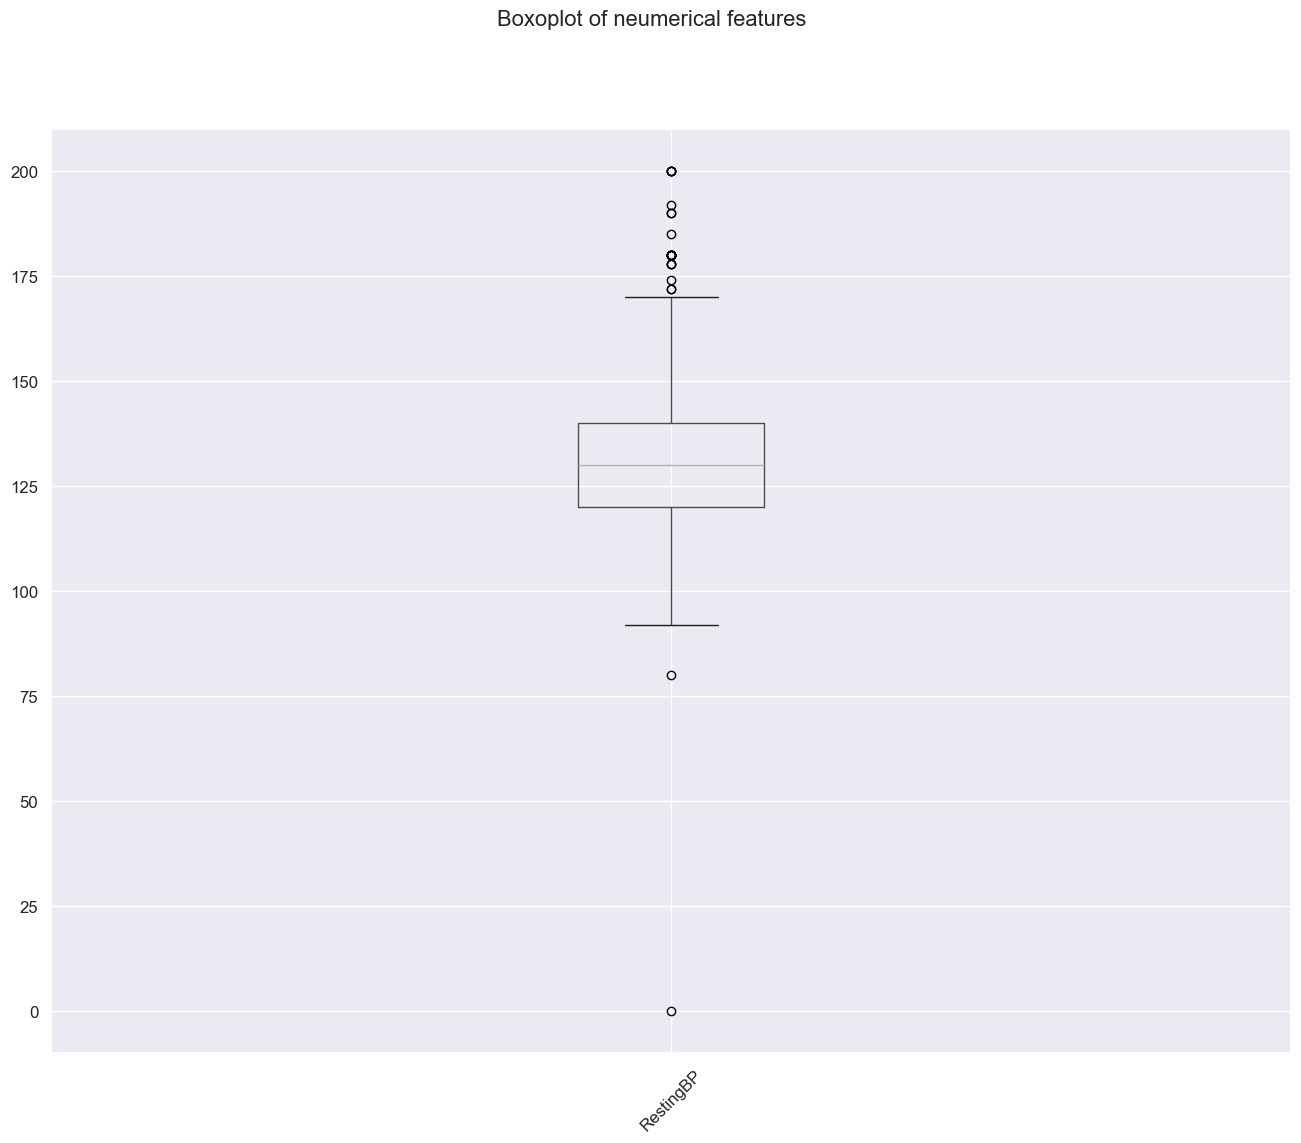

In [42]:
plt.figure(figsize=(16,12))
df.boxplot(column=numeric_cols[1])
plt.suptitle("Boxoplot of neumerical features")
plt.xticks(rotation=45)
plt.show()

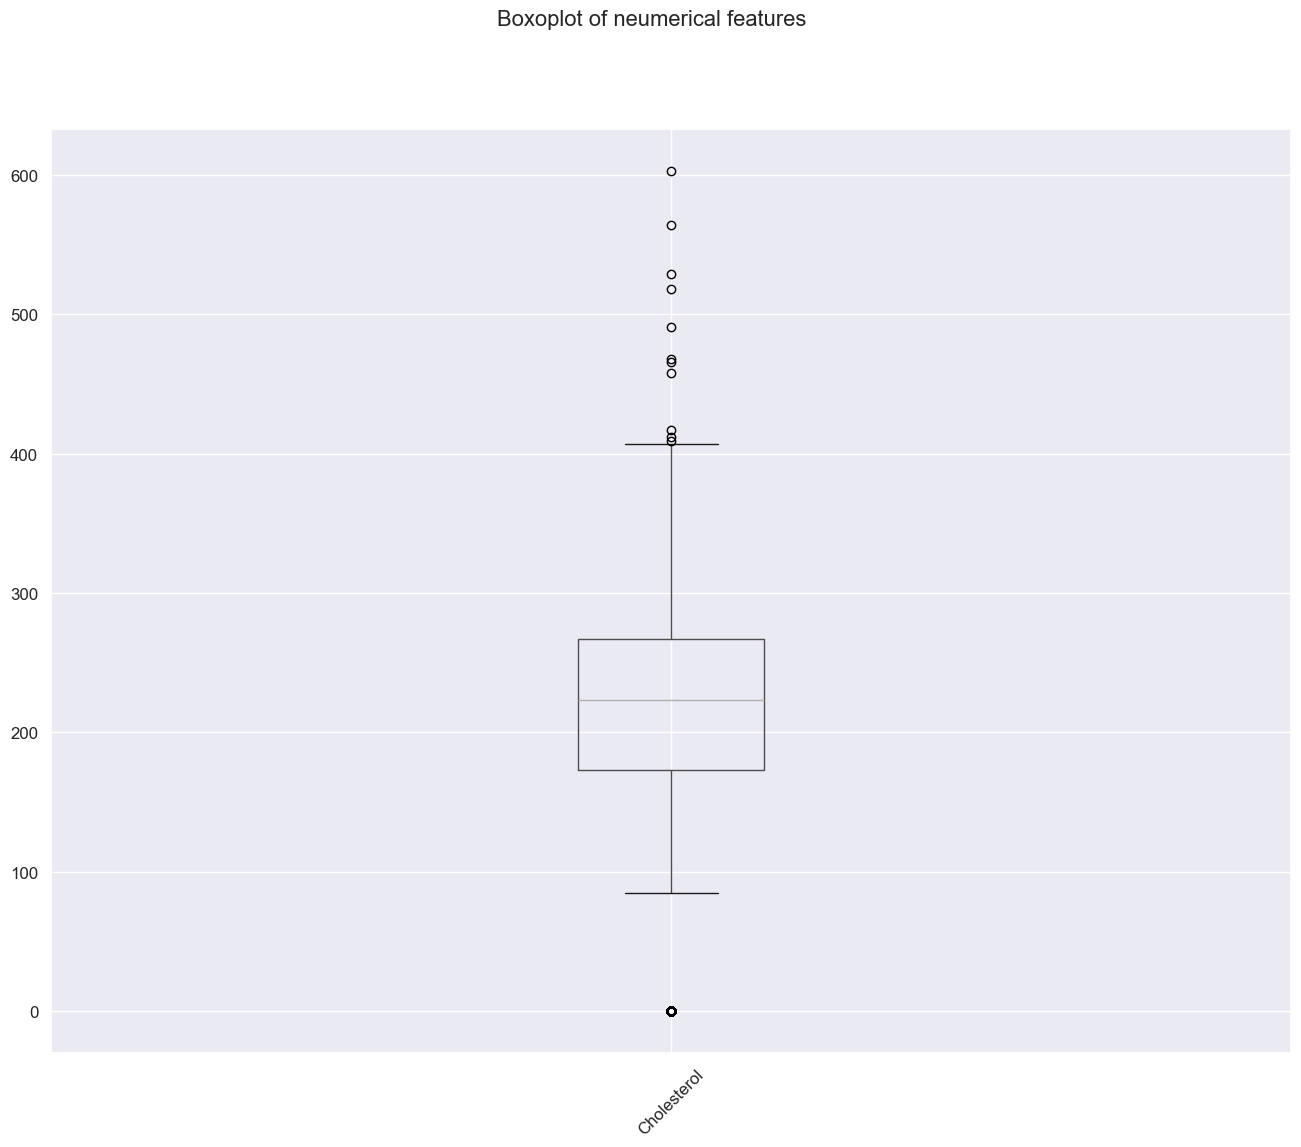

In [43]:
plt.figure(figsize=(16,12))
df.boxplot(column=numeric_cols[2])
plt.suptitle("Boxoplot of neumerical features")
plt.xticks(rotation=45)
plt.show()

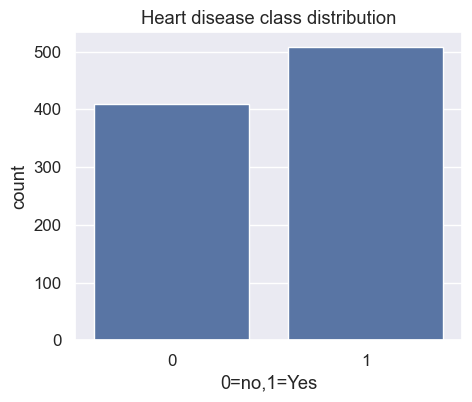

In [44]:
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("Heart disease class distribution")
plt.xlabel("0=no,1=Yes")
plt.ylabel("count")
plt.show()

In [71]:
df[target_col].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

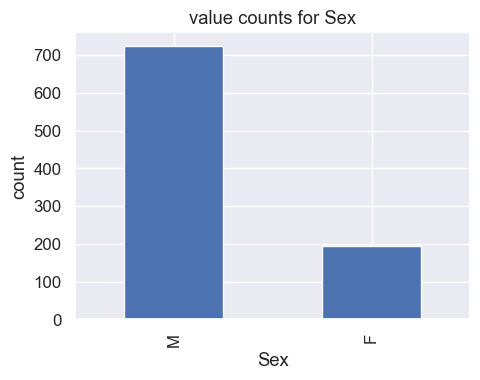

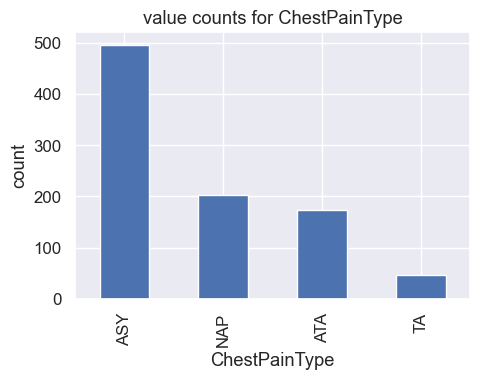

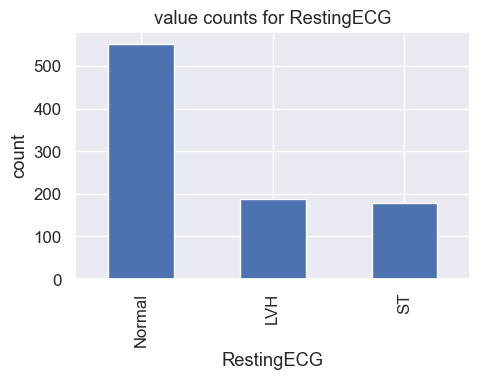

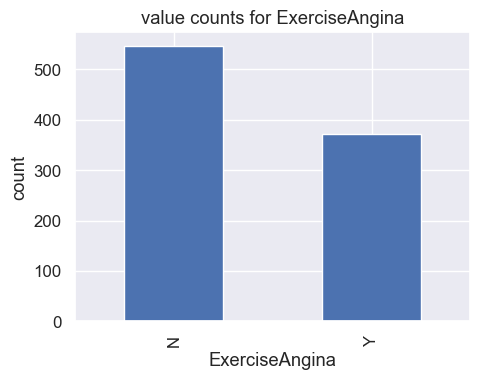

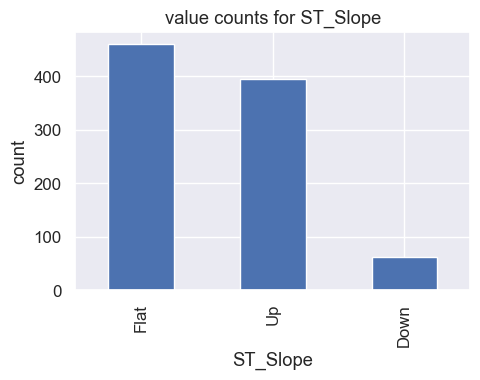

In [45]:
for c in categorical_col:
       plt.figure(figsize=(5,4))
       df[c].value_counts().plot(kind="bar")
       plt.title(f"value counts for {c}")
       plt.ylabel("count")
       
       plt.tight_layout()
       plt.show()

boxplot 

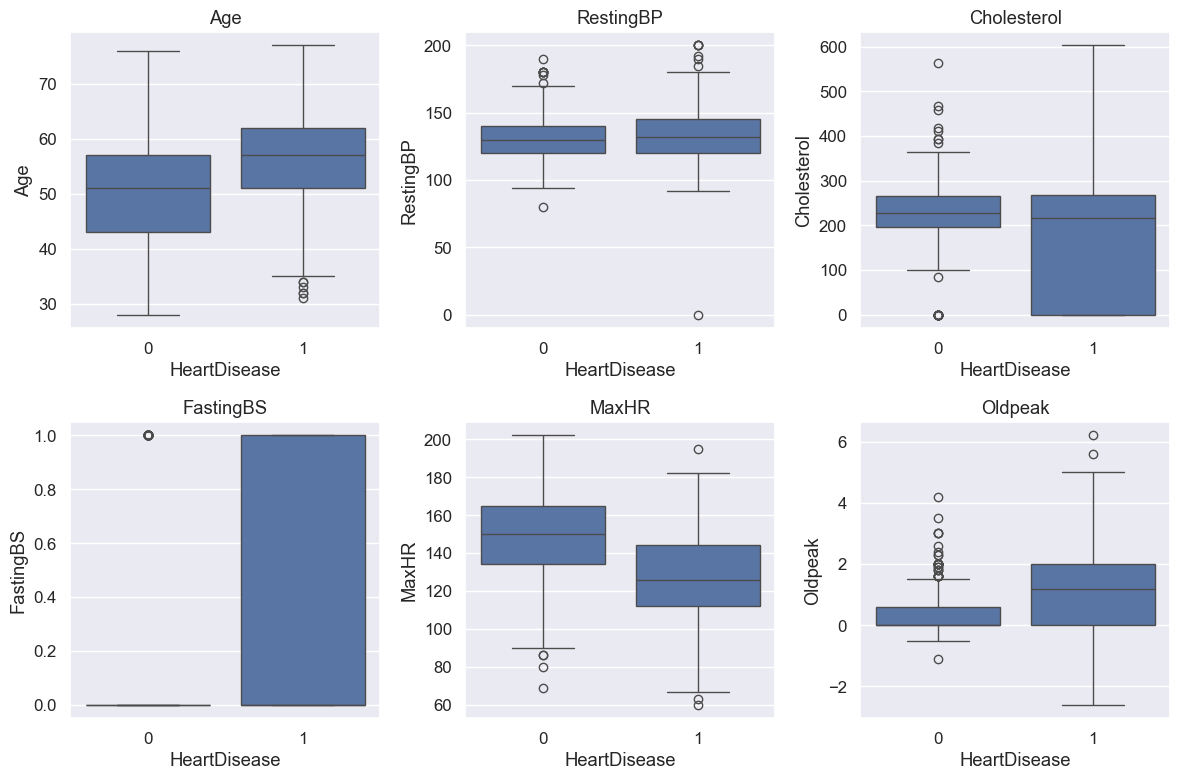

In [46]:
plt.figure(figsize=(12,8))
for i , col in enumerate(numeric_cols,1):
       plt.subplot(2,3,i)
       sns.boxplot(x=df[target_col],y=df[col])
       plt.title(col)
plt.tight_layout()
plt.show()

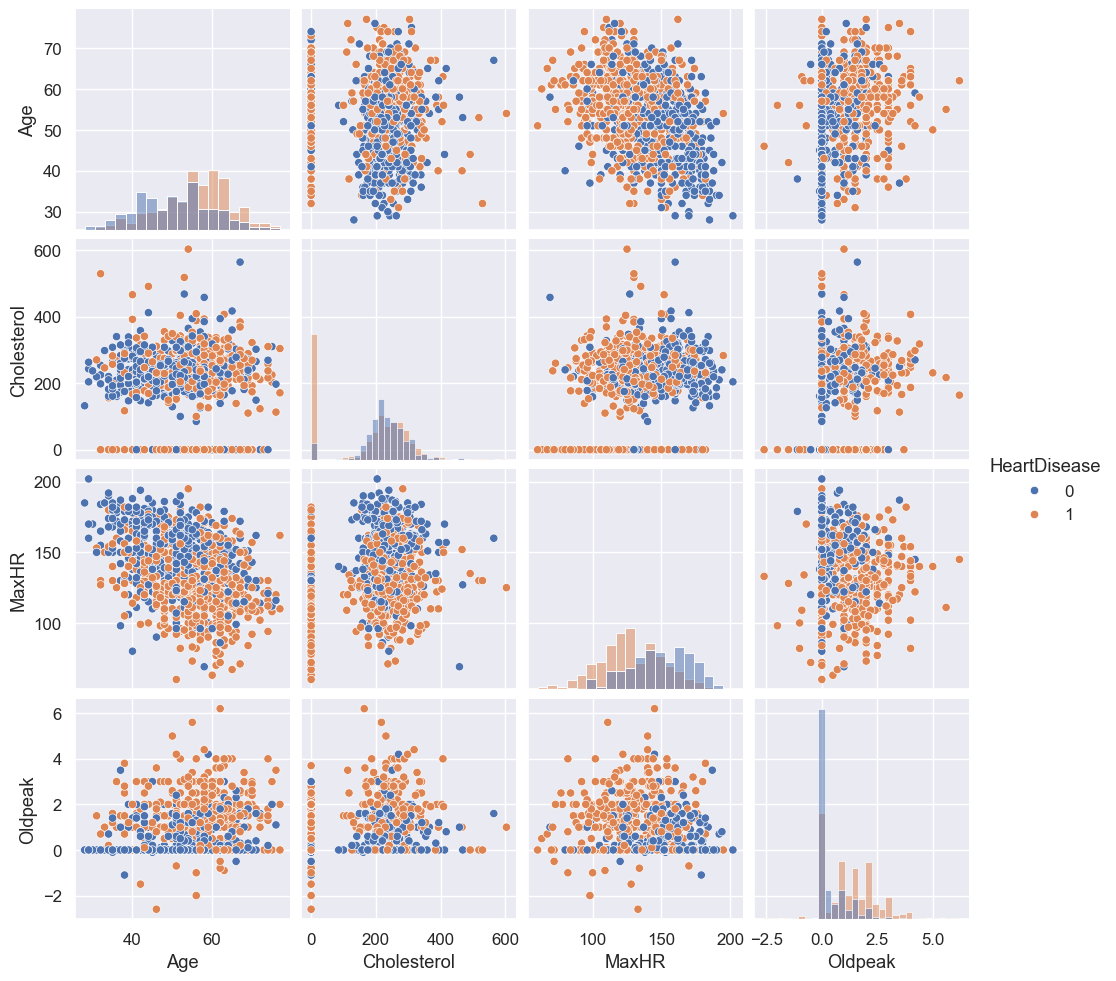

In [47]:
#pairplot 
sns.pairplot(df[["Age","Cholesterol","MaxHR","Oldpeak","HeartDisease"]],hue="HeartDisease",diag_kind="hist")
plt.show()

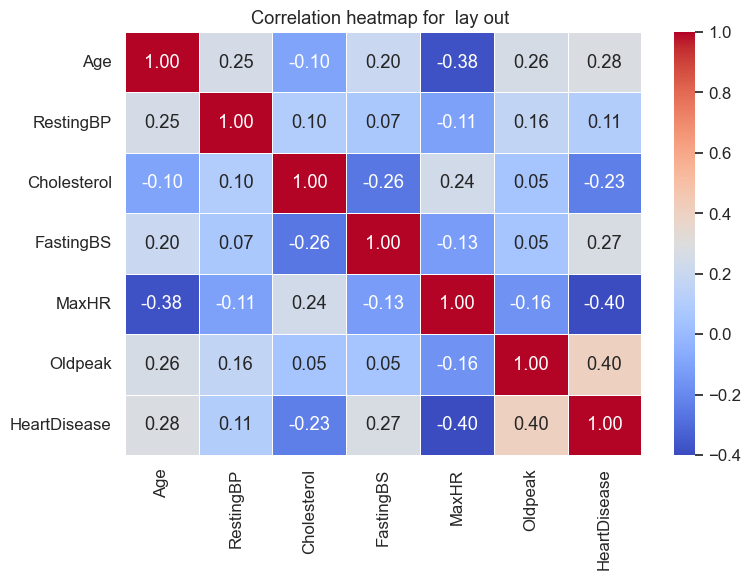

In [48]:
corr_matrix=df[numeric_cols+[target_col]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation heatmap for  lay out ")
plt.tight_layout()
plt.show()

In [49]:
corr_matrix[target_col].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


 prorportion of diseasesSex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


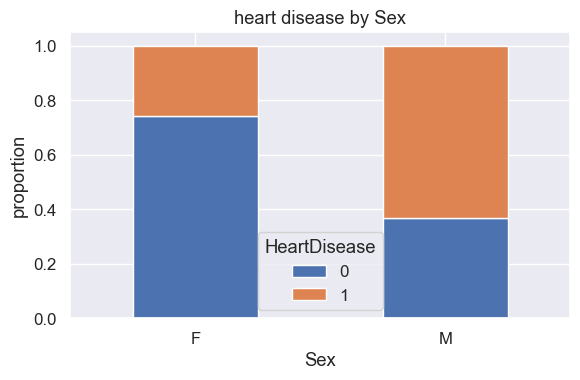


 prorportion of diseasesChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


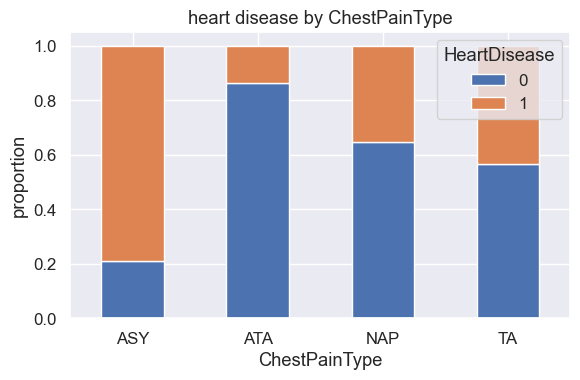


 prorportion of diseasesRestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


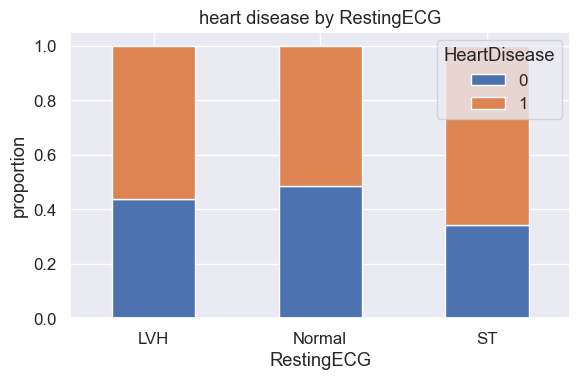


 prorportion of diseasesExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


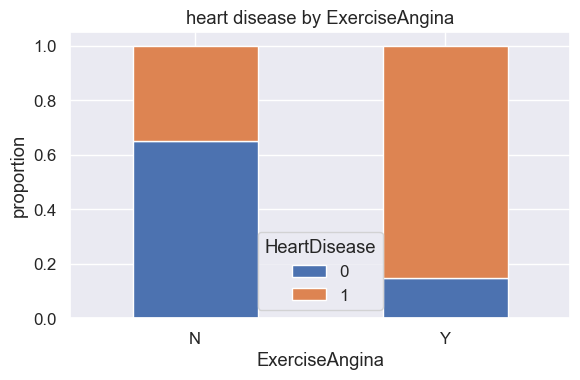


 prorportion of diseasesST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


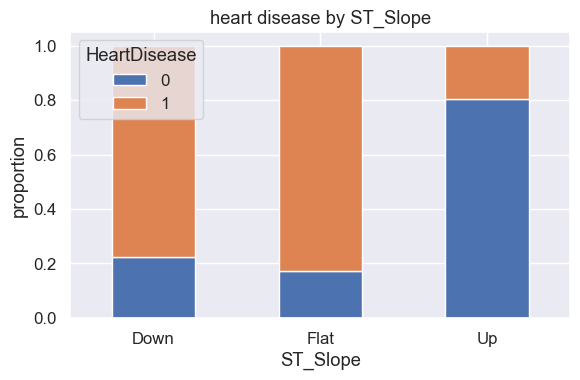

In [50]:
for c in categorical_col:
       ct=pd.crosstab(df[c],df[target_col],normalize="index")
       print(f"\n prorportion of diseases{c}")
       display(ct)

       ct.plot(kind="bar",stacked=True,figsize=(6,4))
       plt.title(f"heart disease by {c}")
       plt.ylabel("proportion")
       plt.xticks(rotation=0)
       plt.tight_layout()
       plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
df=pd.read_csv("heart.csv")
df.head(5)
display(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [52]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


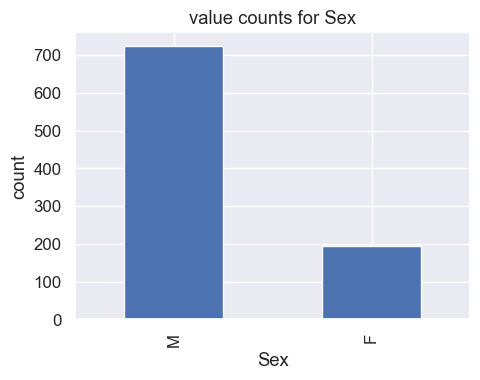

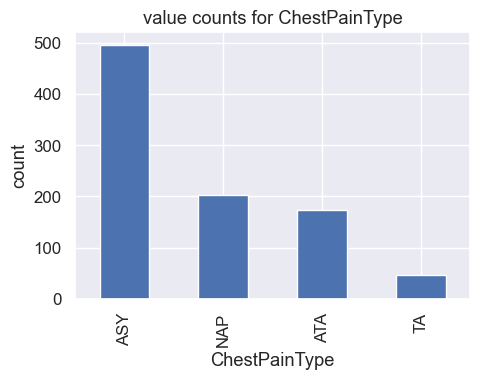

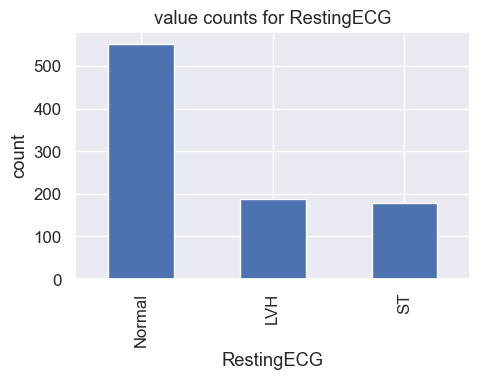

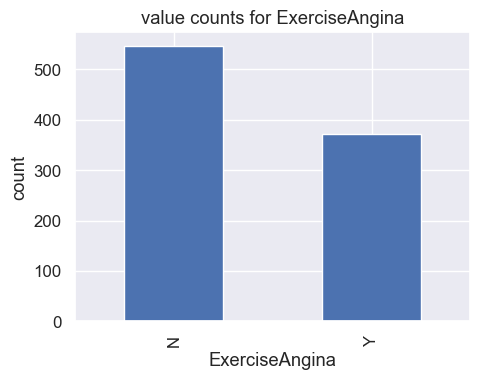

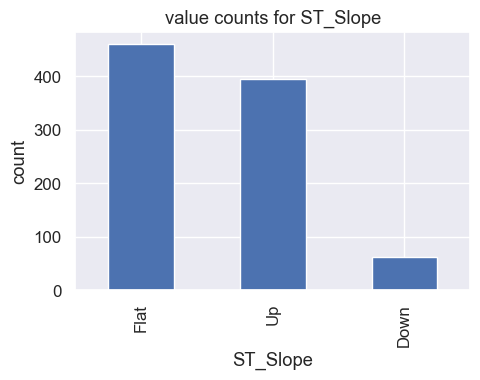

In [53]:
from matplotlib import pyplot as plt 

categorical_col=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
for c in categorical_col:
       plt.figure(figsize=(5,4))
       df[c].value_counts().plot(kind="bar")
       plt.title(f"value counts for {c}")
       plt.ylabel("count")
       
       plt.tight_layout()
       plt.show()


In [54]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["ExerciseAngina"]=le.fit_transform(df["ExerciseAngina"])


In [55]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [56]:
cat_cols=["ChestPainType","RestingECG","ST_Slope"]
df_encoded=pd.get_dummies(df,columns=categorical_col,dtype=int)

In [57]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_0,Sex_1,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
target_col="HeartDisease"
X=df_encoded.drop(columns=[target_col])
y=df_encoded[target_col]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)
scaler_sd=StandardScaler()
X_train_std=scaler_sd.fit_transform(X_train)
X_test_std=scaler_sd.transform(X_test)


X_train_std_df=pd.DataFrame(X_train_std,columns=X_train.columns,index=X_train.index)
display(X_train_std_df.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061,-0.540605,0.540605,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,3.780432,-1.03325,-0.847921
25,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286,-0.540605,0.540605,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.264520,-1.03325,1.179356
84,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745,-0.540605,0.540605,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-1.192662,1.192662,-0.264520,0.96782,-0.847921
10,-1.779375,-0.166285,0.104640,-0.542709,0.229991,-0.836286,1.849780,-1.849780,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.264520,-1.03325,1.179356
344,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286,-0.540605,0.540605,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.264520,0.96782,-0.847921


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
target_col="HeartDisease"
X=df_encoded.drop(columns=[target_col])
y=df_encoded[target_col]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)
scaler_sd=StandardScaler()
X_train_std=scaler_sd.fit_transform(X_train)
X_test_std=scaler_sd.transform(X_test)


X_test_std_df=pd.DataFrame(X_test_std,columns=X_test.columns,index=X_test.index)
display(X_test_std_df.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.999024,0.376415,-0.043312,-0.542709,1.691748,-0.836286,1.849780,-1.849780,-1.097362,2.068955,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.26452,-1.03325,1.179356
30,-0.069591,0.647765,2.943471,-0.542709,-0.244093,-0.836286,-0.540605,0.540605,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.26452,0.96782,-0.847921
377,1.212747,1.461816,-1.846478,1.842609,-0.560148,0.272552,-0.540605,0.540605,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,-1.237350,2.050774,0.838461,-0.838461,-0.26452,0.96782,-0.847921
535,0.250993,-0.166285,-1.846478,-0.542709,-0.560148,0.087745,-0.540605,0.540605,0.911276,-0.483336,-0.532181,-0.213504,1.981458,-1.237350,-0.487621,-1.192662,1.192662,-0.26452,0.96782,-0.847921
807,0.037270,-1.360226,1.010846,-0.542709,0.783088,-0.836286,-0.540605,0.540605,-1.097362,2.068955,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.26452,-1.03325,1.179356


In [60]:
scaler_mm=MinMaxScaler()
X_train_mm=scaler_mm.fit_transform(X_train)
X_test_mm=scaler_mm.transform(X_test)


X_train_mm_df=pd.DataFrame(X_train_mm,columns=X_train.columns,index=X_train.index)
display(X_train_mm_df.head())
X_test_mm_df=pd.DataFrame(X_test_mm,columns=X_test.columns,index=X_test.index)
display(X_test_mm_df.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,0.270833,0.60,0.398010,1.0,0.943662,0.386364,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
25,0.145833,0.65,0.346600,0.0,0.830986,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
84,0.562500,0.75,0.353234,1.0,0.457746,0.409091,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10,0.166667,0.65,0.349917,0.0,0.577465,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
344,0.458333,0.60,0.000000,1.0,0.309859,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.708333,0.700,0.323383,0.0,0.838028,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.500000,0.725,0.859038,0.0,0.492958,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.750000,0.800,0.000000,1.0,0.436620,0.431818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
535,0.562500,0.650,0.000000,0.0,0.436620,0.409091,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
807,0.520833,0.540,0.512438,0.0,0.676056,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
display(X_train_mm_df.head())
display(X_test_std_df.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,0.270833,0.60,0.398010,1.0,0.943662,0.386364,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
25,0.145833,0.65,0.346600,0.0,0.830986,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
84,0.562500,0.75,0.353234,1.0,0.457746,0.409091,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10,0.166667,0.65,0.349917,0.0,0.577465,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
344,0.458333,0.60,0.000000,1.0,0.309859,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.999024,0.376415,-0.043312,-0.542709,1.691748,-0.836286,1.849780,-1.849780,-1.097362,2.068955,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.26452,-1.03325,1.179356
30,-0.069591,0.647765,2.943471,-0.542709,-0.244093,-0.836286,-0.540605,0.540605,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.26452,0.96782,-0.847921
377,1.212747,1.461816,-1.846478,1.842609,-0.560148,0.272552,-0.540605,0.540605,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,-1.237350,2.050774,0.838461,-0.838461,-0.26452,0.96782,-0.847921
535,0.250993,-0.166285,-1.846478,-0.542709,-0.560148,0.087745,-0.540605,0.540605,0.911276,-0.483336,-0.532181,-0.213504,1.981458,-1.237350,-0.487621,-1.192662,1.192662,-0.26452,0.96782,-0.847921
807,0.037270,-1.360226,1.010846,-0.542709,0.783088,-0.836286,-0.540605,0.540605,-1.097362,2.068955,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,0.838461,-0.838461,-0.26452,-1.03325,1.179356
